In [1]:
import pandas as pd 
import json 

In [3]:
import os, glob 


def load_json_files(path):

    with open(path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data


# Corpus

In [4]:
folder_path = "../data/vlsp/legal_corpus.json"
corpus = load_json_files(folder_path)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


def count_content_length(corpus): 
    
    content_counts = {}
    for item in corpus:
        if 'id' in item and 'content' in item:
            content_id = item['id']
            content = item['content']
            
            if isinstance(content, list):
                content_counts[content_id] = len(content)
            else:
                content_counts[content_id] = 1
    
    content_count_df = pd.DataFrame(list(content_counts.items()), columns=['id', 'content_count'])
    
    print("Thống kê số lượng content trong mỗi id:")
    print(f"Tổng số id: {len(content_counts)}")
    print(f"Trung bình số content mỗi id: {sum(content_counts.values()) / len(content_counts):.2f}")
    print(f"Số content ít nhất: {min(content_counts.values())}")
    print(f"Số content nhiều nhất: {max(content_counts.values())}")

    plt.figure(figsize=(10, 6))
    sns.histplot(content_count_df['content_count'], bins=30, kde=True)
    plt.title('Phân phối số lượng content trong mỗi id')
    plt.xlabel('Số lượng content')
    plt.ylabel('Số lượng id trong mỗi nhóm content')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return content_count_df


Thống kê số lượng content trong mỗi id:
Tổng số id: 2157
Trung bình số content mỗi id: 27.65
Số content ít nhất: 0
Số content nhiều nhất: 689


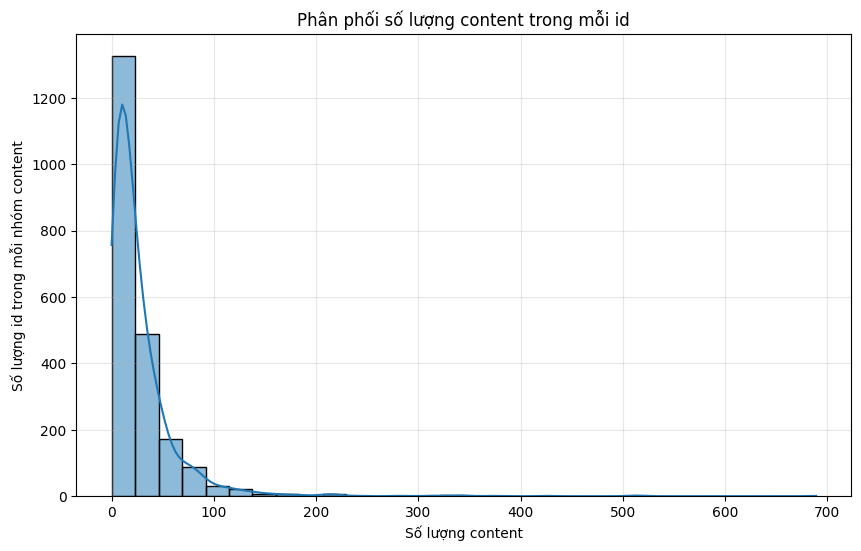

In [10]:
content_count_df =  count_content_length(corpus)

In [11]:
import tiktoken 



def count_chars_and_tokens(text: str): 

    char_count = len(text) 

    encoding_model = tiktoken.encoding_for_model("gpt-3.5-turbo")
    token_count = len(encoding_model.encode(text))

    return char_count, token_count


In [39]:
def char_token_stats(corpus):
    char_counts  = []
    token_counts = []
    char_token_ratios = []

    for item in corpus: 

        if "content" in item: 
            content = item["content"]
            
            for article in content: 
                chars, token = count_chars_and_tokens(article['content_Article'])
                if chars > 0 and token > 0: 
                    char_counts.append(chars)
                    token_counts.append(token)
                    char_token_ratios.append(chars / token)


    content_stats = pd.DataFrame({
        "char_count": char_counts,  
        "token_count": token_counts,
        "char_token_ratio": char_token_ratios
    })
    return content_stats

content_stats = char_token_stats(corpus)


In [18]:
content_stats.describe()

,char_count,token_count,char_token_ratio
count,59635.000000,59635.000000,59635.000000
mean,1379.782695,680.978553,2.028712
std,2711.384087,1345.731462,0.102838
min,1.000000,1.000000,1.000000
25%,441.000000,217.000000,1.964169
50%,835.000000,412.000000,2.022650
75%,1565.000000,774.000000,2.088174
max,255092.000000,131481.000000,3.006047


In [19]:
content_stats

,char_count,token_count,char_token_ratio
0,263,122,2.155738
1,229,112,2.044643
2,1006,507,1.984221
3,5988,2945,2.033277
4,4540,2218,2.046889
...,...,...,...
59630,1126,565,1.992920
59631,28313,14212,1.992190
59632,267,138,1.934783
59633,1740,882,1.972789


In [32]:
import numpy as np 

def plot_content_stats(content_stats):
    print("\nThống kê về phân bố kí tự và token:")
    print(f"Tổng số bài viết: {len(content_stats)}")
    print(f"Trung bình số kí tự mỗi bài: {content_stats['char_count'].mean():.2f}")
    print(f"Trung bình số token mỗi bài: {content_stats['token_count'].mean():.2f}")
    print(f"Trung bình tỉ lệ kí tự/token: {content_stats['char_token_ratio'].mean():.2f}")
    print(f"Số kí tự ít nhất: {content_stats['char_count'].min()}")
    print(f"Số kí tự nhiều nhất: {content_stats['char_count'].max()}")
    print(f"Số token ít nhất: {content_stats['token_count'].min()}")
    print(f"Số token nhiều nhất: {content_stats['token_count'].max()}")


    # Thống kê phân vị
    print("\nPhân vị phân bố kí tự:")
    for p in [5, 25, 50, 75, 95]:
        print(f"{p}%: {np.percentile(content_stats['char_count'], p):.1f}")

    print("\nPhân vị phân bố token:")
    for p in [5, 25, 50, 75, 95]:
        print(f"{p}%: {np.percentile(content_stats['token_count'], p):.1f}")

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(y=content_stats['char_count'])
    plt.title('Boxplot số lượng kí tự trong content_article')
    plt.ylabel('Số lượng kí tự')
    plt.xlabel('')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=content_stats['token_count'])
    plt.title('Boxplot số lượng token trong content_article')
    plt.ylabel('Số lượng token')
    plt.xlabel('')

    plt.tight_layout()
    plt.show()
    plt.close()



Thống kê về phân bố kí tự và token:
Tổng số bài viết: 59635
Trung bình số kí tự mỗi bài: 1379.78
Trung bình số token mỗi bài: 680.98
Trung bình tỉ lệ kí tự/token: 2.03
Số kí tự ít nhất: 1
Số kí tự nhiều nhất: 255092
Số token ít nhất: 1
Số token nhiều nhất: 131481

Phân vị phân bố kí tự:
5%: 181.7
25%: 441.0
50%: 835.0
75%: 1565.0
95%: 3887.0

Phân vị phân bố token:
5%: 89.0
25%: 217.0
50%: 412.0
75%: 774.0
95%: 1920.0


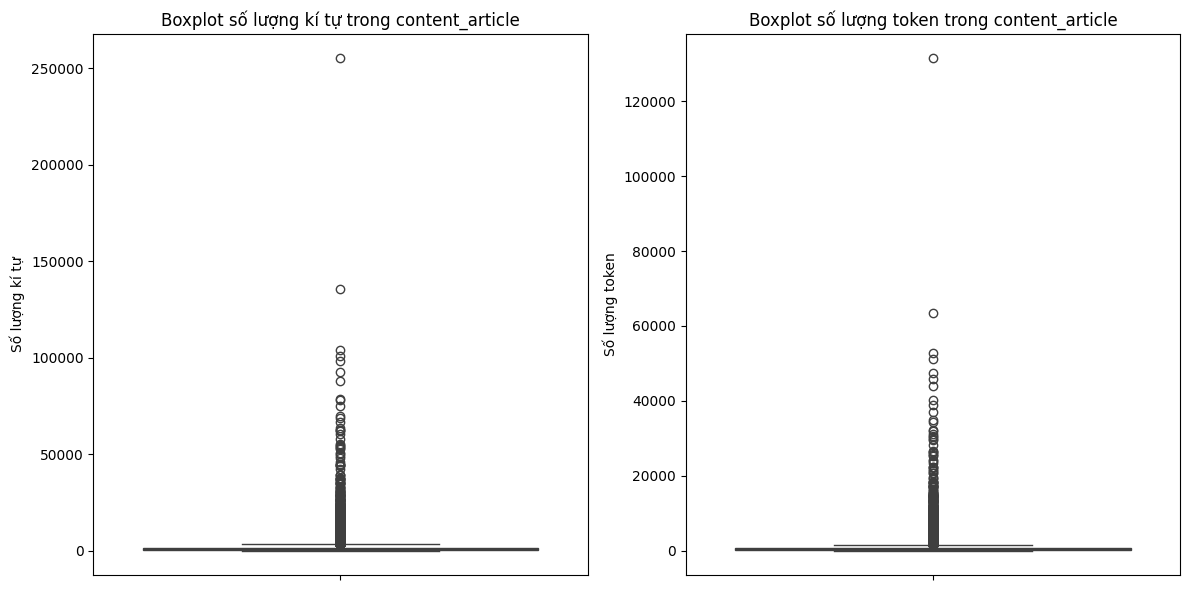

In [33]:
plot_content_stats(content_stats)

# Train 

In [34]:
train_path = "../data/vlsp/train.json" 
train = load_json_files(train_path)

In [37]:
def count_relevant_laws_dist(train: list): 

    relevant_count = {}
    for item in train:
        id = item.get("qid", "")
        laws = item.get("relevant_laws", [])
        relevant_count[id] = len(laws)

    relevant_count_df = pd.DataFrame(list(relevant_count.items()), columns=['id', 'relevant_count'])
    print("Thống kê số lượng luật liên quan trong mỗi id:")
    print(f"Tổng số id: {len(relevant_count)}")
    print(f"Trung bình số luật liên quan mỗi id: {sum(relevant_count.values()) / len(relevant_count):.2f}")
    print(f"Số luật liên quan ít nhất: {min(relevant_count.values())}")
    print(f"Số luật liên quan nhiều nhất: {max(relevant_count.values())}")
    plt.figure(figsize=(10, 6))
    sns.histplot(relevant_count_df['relevant_count'], bins=30, kde=True)
    plt.title('Phân phối số lượng luật liên quan trong mỗi id')
    plt.xlabel('Số lượng luật liên quan')
    plt.ylabel('Số lượng id trong mỗi nhóm luật liên quan')
    plt.grid(True, alpha=0.3)
    plt.show()
    return relevant_count

Thống kê số lượng luật liên quan trong mỗi id:
Tổng số id: 2190
Trung bình số luật liên quan mỗi id: 1.34
Số luật liên quan ít nhất: 1
Số luật liên quan nhiều nhất: 9


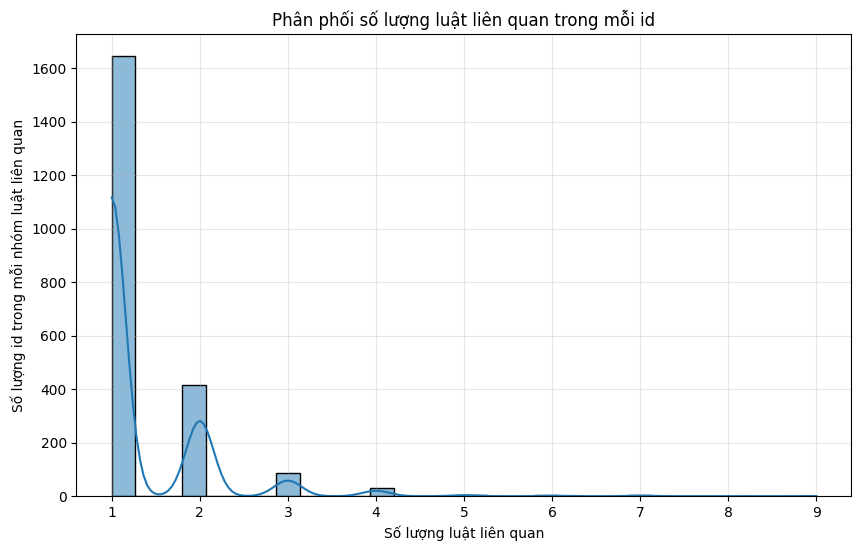

In [38]:
relevant_count = count_relevant_laws_dist(train)

In [40]:
def train_char_token_stats(train):
    char_counts  = []
    token_counts = []
    char_token_ratios = []

    for item in train: 
        char, token = count_chars_and_tokens(item['question'])
        char_counts.append(char)
        token_counts.append(token)
        if token > 0:
            char_token_ratios.append(char / token)

    train_content_stats = pd.DataFrame({
        "char_count": char_counts,  
        "token_count": token_counts,
        "char_token_ratio": char_token_ratios
    })
    return train_content_stats

In [41]:
train_content_stats = train_char_token_stats(train)


Thống kê về phân bố kí tự và token:
Tổng số bài viết: 2190
Trung bình số kí tự mỗi bài: 88.36
Trung bình số token mỗi bài: 43.47
Trung bình tỉ lệ kí tự/token: 2.04
Số kí tự ít nhất: 23
Số kí tự nhiều nhất: 200
Số token ít nhất: 12
Số token nhiều nhất: 103

Phân vị phân bố kí tự:
5%: 54.0
25%: 67.0
50%: 83.0
75%: 104.0
95%: 143.0

Phân vị phân bố token:
5%: 26.0
25%: 33.0
50%: 41.0
75%: 51.0
95%: 70.0


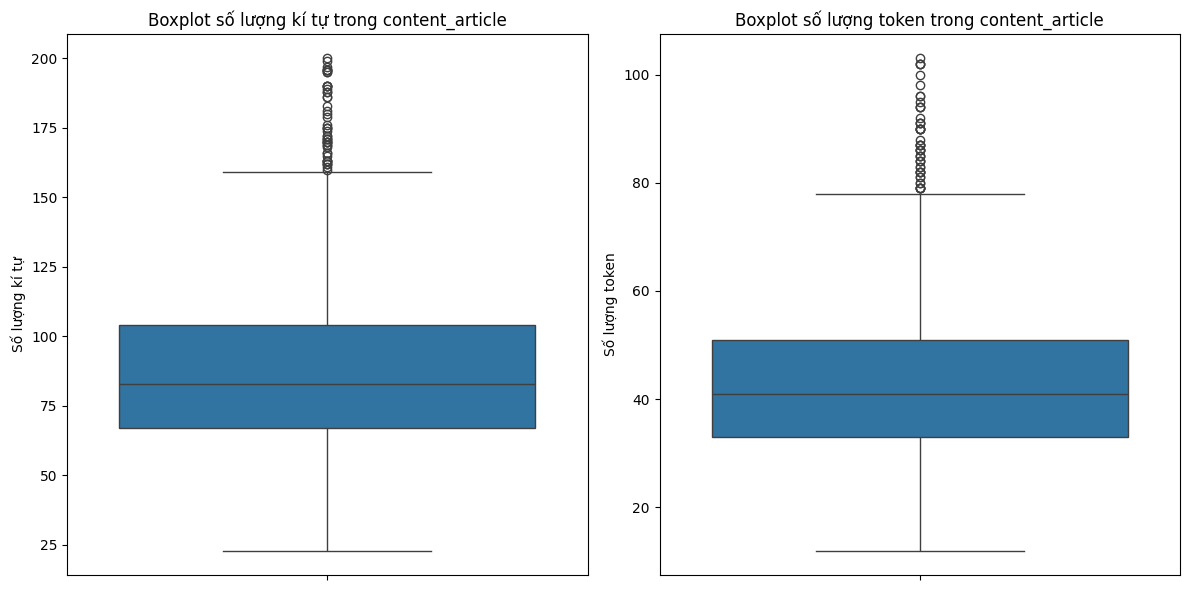

In [42]:
plot_content_stats(train_content_stats)